In [4]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# uncomment to force package installation
# github_project("QuantEcon/quantecon-notebooks-julia", version="0.5.0", instantiate=true)


using LinearAlgebra, Statistics

"foo" * "bar"

Activated /Users/yurimatsumura/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.5.0


"foobar"

In [6]:
s = "Hello the World"
split(s)

3-element Array{SubString{String},1}:
 "Hello"
 "the"
 "World"

In [8]:
replace(s, "Hello" => "Goodbay")

"Goodbay the World"

In [10]:
actions = ["surf" , "ski"]
for action in actions
    println("Taisei doesn't $action.")
end

Taisei doesn't surf.
Taisei doesn't ski.


In [18]:
d = Dict("nam" => "Frodo", "age" => 33)
values(d)

Base.ValueIterator for a Dict{String,Any} with 2 entries. Values:
  "Frodo"
  33

In [22]:
x_vec = [2.0, 4.0, 6.0, 8.0]
y_vec = similar(x_vec)
for (i,x) in enumerate(x_vec)
    y_vec[i] = sin(x)
end

print(y_vec)

[0.9092974268256817, -0.7568024953079282, -0.27941549819892586, 0.9893582466233818]

In [28]:
# Exercise 1 part 1

n = 100

x_vals = [1,2,3]
y_vals = [1,1,1]


inner_prod = sum(x * y for (x, y) in zip(x_vals, y_vals))



6

In [40]:
# Exercise 1 part 2

numbers = [i for i in 0:99]


count = sum(iseven, 0:99)

50

In [89]:
# Exercise 1 part 3

pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
count = sum(iseven, [iseven.(pairs[i][1]) .* iseven.(pairs[i][2]) for i  in 1:4 ]  ) 



2

In [141]:
# Exercise 2

p(x,coeff) = sum( a * x^(i-1) for (i, a) in enumerate(coeff))

p(2,[1,2])

5

In [152]:
# Exercise 3


counter(x) = sum(uppercase(x)[i] == x[i] for i in 1:length(x)) # uppercase makes all letters be capital letters

x = "ClosurWithTheEmbedded"
counter(x)

4

In [1]:
# Exercise 4 

counter(x, y) = all(x[i] == y[i] for i in 1:length(x))  # all is a function which returns true if for every elements an argument is true

x = [1,2,5,6,7,83,100]
y = [1,2,5,6,7,83,100]
    
counter(x,y)


true

In [2]:
function linear_approximate(f,a,b,n,x)
    setp = (a - b)/(n - 1)
    point = a
    while point ≤ x
        point += step
    end
    
    u , v = point - step, point
    
    return f(u) + (x - u) *(f(u) - f(v))/(u - v)
end         
        

linear_approximate (generic function with 1 method)

In [20]:
# Exercise 6 ver.1


open("us_cities.txt", "w") do f
  write(f,
"new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229")
end


total_population = 0
for line in  eachline("us_cities.txt")
    sentence = split(line)
    total_population += parse(Int, sentence[end])
end

print(total_population)




23831986

In [22]:
# Exercise 6 ver.2


open("us_cities.txt", "w") do f
  write(f,
"new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229")
end

x = open("us_cities.txt", "r")
total_population = 0
for line in  eachline(x)
    city, population = split(line, ":")
    total_population += parse(Int, population)
end

print(total_population)




23831986

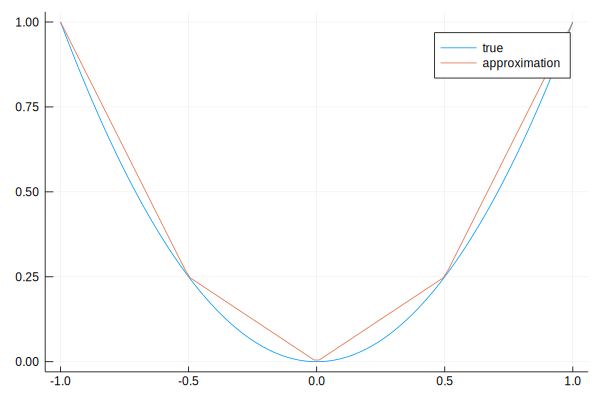

In [40]:
# Exercise 7 

using Plots


function linapprox(f, nodes, x)
    point = nodes[1]
    steps = step(nodes)
    point += steps * floor((x - point)/steps)
    
    u , v = point, point + steps  
    
    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)
end


f_ex5(x) = x^2
nodes = -1.0:0.5:1.0

g_ex5(x) = linapprox(f_ex5,nodes, x)
x_grid = range(-1.0, 1.0, length = 100)
y_vals = f_ex5.(x_grid)
y = g_ex5.(x_grid)
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation")
